# Capstone Project - Car accident severity (Week 2)
### Applied Data Science Capstone

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusions](#conclusions)

## Introduction <a name="introduction"></a>

### Load required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

## Data <a name="data"></a>
### About dataset 
##### The dataset used in this project is downloaded from  https://www.kaggle.com/sobhanmoosavi/us-accidents.

### Acknowledgements
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

In [2]:
# Define parameters

state_lst=['WA']
state_lst_full=['Washington']

severity_lst=[2,3,4]

color_lst=['k']
marker_lst=['*']
linestyle_lst=['solid']

month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)
td='Time_Duration(min)'

### Load Data From CSV File

In [3]:
df = pd.read_csv(r'C:\Users\US_Accidents_June20.csv')
df = df[df.State.isin(state_lst)]
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
307066,A-307069,MapQuest,201.0,3,2016-11-30 16:06:44,2016-11-30 17:21:05,47.008610,-122.907059,NaN,NaN,0.01,Very slow traffic and right lane blocked due t...,NaN,I-5 N,R,Olympia,Thurston,WA,98501,US,US/Pacific,KOLM,2016-11-30 15:54:00,48.0,NaN,77.0,30.09,10.0,SW,9.2,NaN,Scattered Clouds,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
307067,A-307070,MapQuest,201.0,3,2016-11-30 16:40:11,2016-11-30 17:25:11,47.014576,-122.905884,NaN,NaN,0.01,Accident on I-5 Northbound at Exit 103 Deschut...,NaN,I-5 N,R,Olympia,Thurston,WA,98501,US,US/Pacific,KOLM,2016-11-30 16:54:00,45.0,41.2,82.0,30.11,10.0,SW,6.9,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
307068,A-307071,MapQuest,201.0,2,2016-11-30 16:50:57,2016-11-30 17:35:17,47.649269,-122.304649,NaN,NaN,0.01,Accident on WA-513 Montlake Blvd at Pacific St.,3172.0,Montlake Blvd NE,L,Seattle,King,WA,98195,US,US/Pacific,KBFI,2016-11-30 16:53:00,48.9,NaN,77.0,30.06,10.0,SSW,6.9,0.03,Light Rain,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day
307069,A-307072,MapQuest,201.0,2,2016-11-30 17:03:49,2016-11-30 17:47:25,46.858688,-123.257339,NaN,NaN,0.01,Accident on US-12 at Lonborg Roy Rd.,6637.0,State Route 12,R,Oakville,Grays Harbor,WA,98568-9608,US,US/Pacific,KCLS,2016-11-30 15:55:00,46.4,41.9,87.0,30.12,9.0,South,9.2,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
307070,A-307073,MapQuest,201.0,2,2016-11-30 17:05:01,2016-11-30 17:34:32,47.614941,-122.328667,NaN,NaN,0.01,Right lane blocked due to accident on Pine St ...,1598.0,Minor Ave,R,Seattle,King,WA,98101-2853,US,US/Pacific,KBFI,2016-11-30 16:53:00,48.9,NaN,77.0,30.06,10.0,SSW,6.9,0.03,Light Rain,True,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


### Data manipulation
#### Extract year, month, day, hour, & weekday

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min)
307066,A-307069,MapQuest,201.0,3,2016-11-30 16:06:44,2016-11-30 17:21:05,47.008610,-122.907059,NaN,NaN,0.01,Very slow traffic and right lane blocked due t...,NaN,I-5 N,R,Olympia,Thurston,WA,98501,US,US/Pacific,KOLM,2016-11-30 15:54:00,48.0,NaN,77.0,30.09,10.0,SW,9.2,NaN,Scattered Clouds,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,16,Wed,74.0
307067,A-307070,MapQuest,201.0,3,2016-11-30 16:40:11,2016-11-30 17:25:11,47.014576,-122.905884,NaN,NaN,0.01,Accident on I-5 Northbound at Exit 103 Deschut...,NaN,I-5 N,R,Olympia,Thurston,WA,98501,US,US/Pacific,KOLM,2016-11-30 16:54:00,45.0,41.2,82.0,30.11,10.0,SW,6.9,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016,Nov,30,16,Wed,45.0
307068,A-307071,MapQuest,201.0,2,2016-11-30 16:50:57,2016-11-30 17:35:17,47.649269,-122.304649,NaN,NaN,0.01,Accident on WA-513 Montlake Blvd at Pacific St.,3172.0,Montlake Blvd NE,L,Seattle,King,WA,98195,US,US/Pacific,KBFI,2016-11-30 16:53:00,48.9,NaN,77.0,30.06,10.0,SSW,6.9,0.03,Light Rain,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day,2016,Nov,30,16,Wed,44.0
307069,A-307072,MapQuest,201.0,2,2016-11-30 17:03:49,2016-11-30 17:47:25,46.858688,-123.257339,NaN,NaN,0.01,Accident on US-12 at Lonborg Roy Rd.,6637.0,State Route 12,R,Oakville,Grays Harbor,WA,98568-9608,US,US/Pacific,KCLS,2016-11-30 15:55:00,46.4,41.9,87.0,30.12,9.0,South,9.2,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,Nov,30,17,Wed,44.0
307070,A-307073,MapQuest,201.0,2,2016-11-30 17:05:01,2016-11-30 17:34:32,47.614941,-122.328667,NaN,NaN,0.01,Right lane blocked due to accident on Pine St ...,1598.0,Minor Ave,R,Seattle,King,WA,98101-2853,US,US/Pacific,KBFI,2016-11-30 16:53:00,48.9,NaN,77.0,30.06,10.0,SSW,6.9,0.03,Light Rain,True,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,Nov,30,17,Wed,30.0


## Methodology <a name="methodology"></a>

### Data visualization and analysis

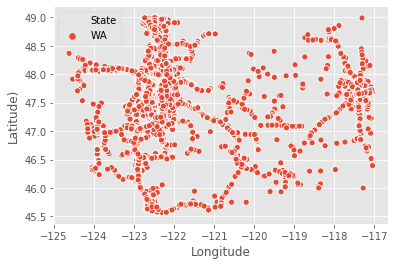

In [5]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

In [6]:
# Ckeck duration of this dataset
print('{} to {}.'.format(df.Start_Time.min(),df.Start_Time.max()))

2016-06-14 19:48:14 to 2020-06-30 20:24:09.


In [7]:
# Find out how many days (Monday-Sunday) in this dataset.

calendar_weekday_num=[]

d1=df.Start_Time.min()
d2=df.Start_Time.max()

for i in range(7):

    count = 0

    for d_ord in range(d1.toordinal(), d2.toordinal()+1):
        d = date.fromordinal(d_ord)
        if (d.weekday() == i):
            count += 1
    calendar_weekday_num.append(count)

print('Number of days for Monday-Sunday: {}.'.format(calendar_weekday_num))
print('Total number of days between {} and {}: {} days.'.format(d1,d2,sum(calendar_weekday_num)))

Number of days for Monday-Sunday: [211, 212, 211, 211, 211, 211, 211].
Total number of days between 2016-06-14 19:48:14 and 2020-06-30 20:24:09: 1478 days.


In [8]:
# Find out average accidents per day
allday_lst=df.Start_Time.astype(str).str.split(' ')
allday_lst2=[item[0] for item in allday_lst]

print('There are {} total accidents.'.format(df.shape[0]))
print('There are {} total days.'.format(len(allday_lst2)))
print('There are {} unique days.'.format(len(set(allday_lst2))))
print('On average, there are {} accidents per day.'.format(round(df.shape[0]/len(set(allday_lst2)))))

There are 68544 total accidents.
There are 68544 total days.
There are 1469 unique days.
On average, there are 47 accidents per day.


In [9]:
# Find the list of numbers of weekdays (Mon-Sun)

weekday_num_state=[]

for state in state_lst:
    
    weekday_num=[]
    
    for weekday in weekday_lst:
        
        df_weekday=df[(df['State']==state) & (df.Start_Weekday==weekday)]
        
        day_lst1=df_weekday.Start_Time.astype(str).str.split(' ')
        
        day_lst2=[item[0] for item in day_lst1]
        
        weekday_num.append(len(set(day_lst2)))

    weekday_num_state.append(weekday_num)

print('For {}, here is the list of numbers of weekdays (Mon-Sun): {}.'.format(state_lst,weekday_num_state))

For ['WA'], here is the list of numbers of weekdays (Mon-Sun): [[210, 212, 210, 210, 209, 209, 209]].


In [10]:
# Find out the percentage of days with accidents
day_pct_lst=[]
for i,state in enumerate(state_lst):
    day_pct=[round(int(item1)/int(item2),2)*100 for item1,item2 in zip(weekday_num_state[i],calendar_weekday_num)]
    day_pct_lst.append(day_pct)
    print('For {}, the percentage of days with accident during this period: {}%.'.format(state_lst[i], day_pct))

For WA, the percentage of days with accident during this period: [100.0, 100.0, 100.0, 100.0, 99.0, 99.0, 99.0]%.


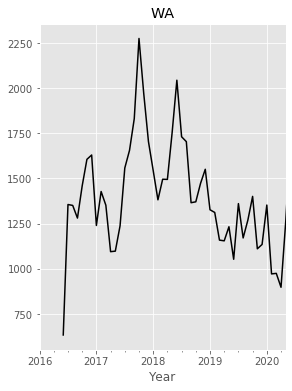

In [11]:
# Find out the accidents by month

df.set_index('Start_Time',drop=True,inplace=True)


# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].resample('M').count()['ID'].plot(linestyle=linestyle_lst[i], color=color_lst[i])
    
    plt.xlim('2016','2020-May')
    plt.xlabel('Year')
    plt.ylabel('Number of collisions')
    plt.title('{}'.format(state))

plt.show()

df.reset_index(inplace=True)

In [12]:
df.Severity.value_counts().sort_values(ascending=False)

2    41732
3    23234
4     3047
1      531
Name: Severity, dtype: int64

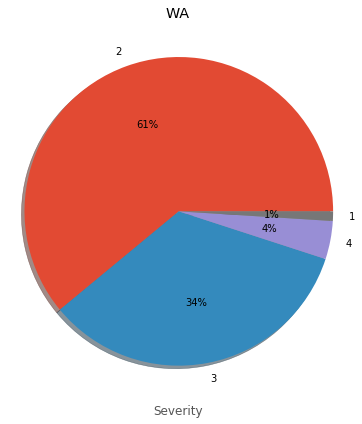

In [13]:
# Find out the severity of accidents 
feature='Severity'

fig= plt.figure(figsize=(15,6))

pct_cutoff=0

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


for i,state in enumerate(state_lst):
    
    plt.subplot(1, 3, 1+i)
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

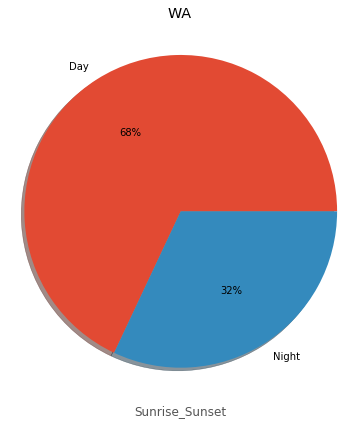

In [14]:
# What time of day do most accidents occur? 
feature='Sunrise_Sunset'

fig= plt.figure(figsize=(15,6))

pct_cutoff=2

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


for i,state in enumerate(state_lst):
    
    plt.subplot(1, 3, 1+i)
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 

    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()

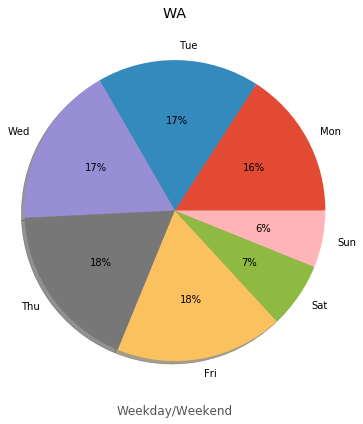

In [15]:
# Find out the % of accidents per day

feature='Start_Weekday'
fig_x=len(state_lst)

fig= plt.figure(figsize=(15,6))

pct_cutoff=2

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    plt.subplot(1, 3, 1+i)
    
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
      
    df_temp2=pd.Series(df_temp2)
    
    labels = [n if v > pct_cutoff/100 else '' for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp2, labels=labels, autopct=my_autopct, shadow=True)
        
    plt.axis('equal')
    plt.xlabel('Weekday/Weekend')
    plt.title(state)   

plt.tight_layout()
plt.show()

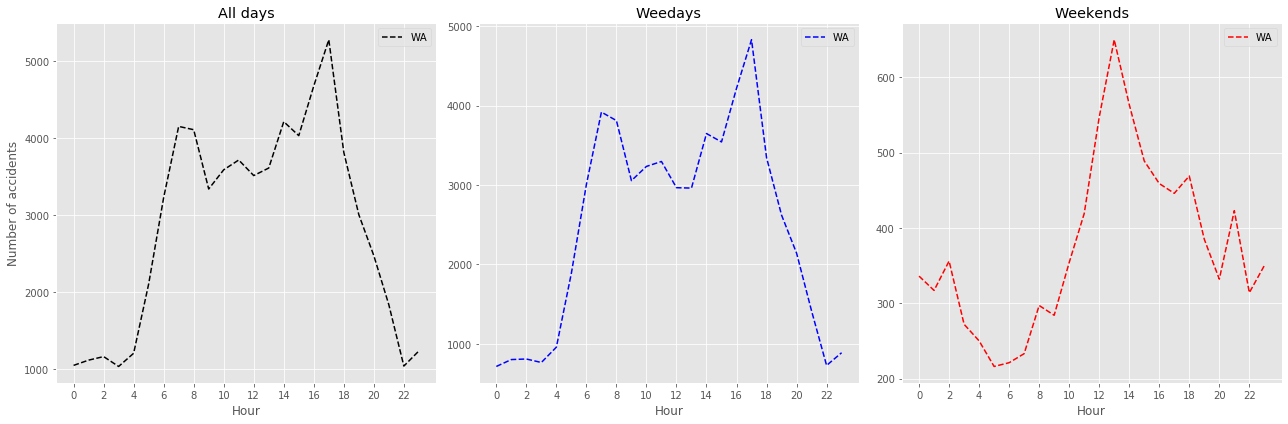

In [16]:
# Find out hourly distribution of accidents on all days, weekdays, & weekends
fig= plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)

df[df['State']=='WA'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='k')


plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.legend(['WA'])
plt.title('All days')
plt.xticks(np.arange(0, 24, step=2))

plt.subplot(1, 3, 2)

df[(df['State']=='WA') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='b')

plt.xlabel('Hour')
plt.legend(['WA'])
plt.title('Weedays')
plt.xticks(np.arange(0, 24, step=2))

plt.subplot(1, 3, 3)

df[(df['State']=='WA') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')

plt.xlabel('Hour')
plt.legend(['WA'])
plt.title('Weekends')
plt.xticks(np.arange(0, 24, step=2))

plt.tight_layout()
plt.show()

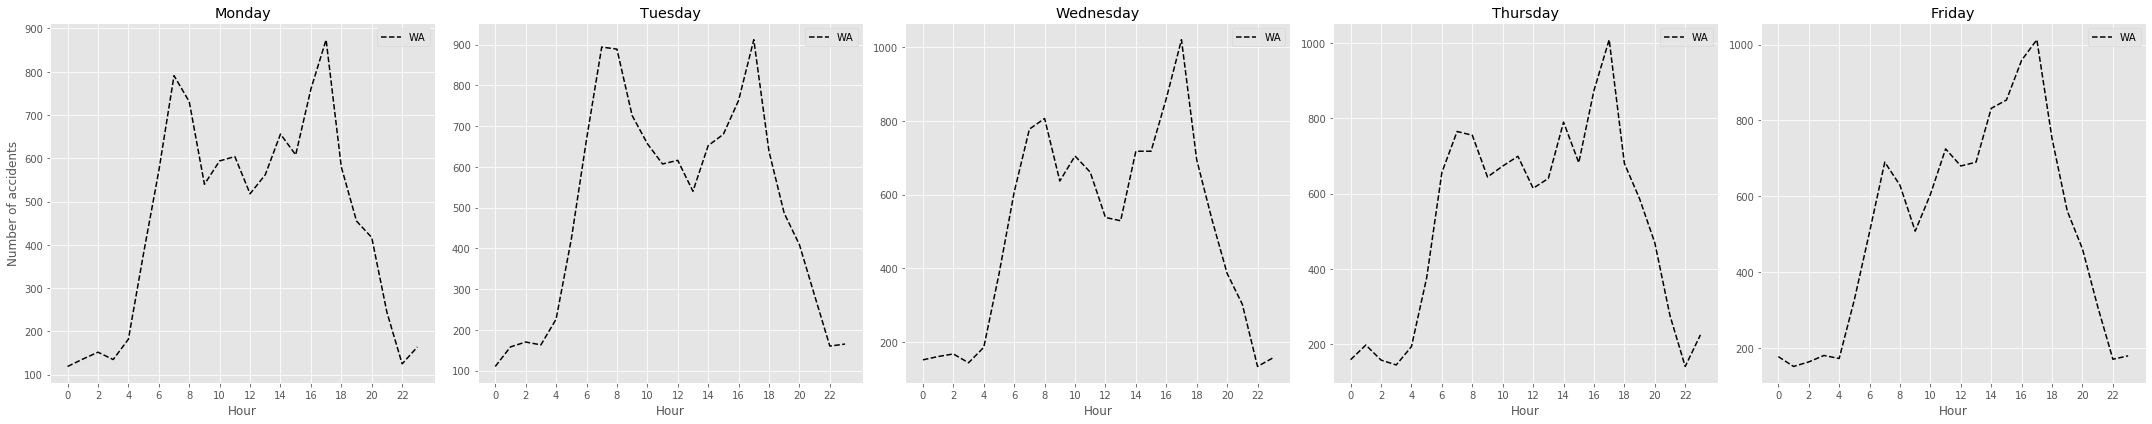

In [17]:
# Find out hourly distribution of accidents on weekdays

fig= plt.figure(figsize=(30,6))
n=5

for i in range(n):
    plt.subplot(1, 5, i+1)
    
    df[(df['State']=='WA') & (df['Start_Weekday']==weekday_lst[i])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='k')
    
    plt.xlabel('Hour')
    plt.legend(['WA'])
    plt.title(weekday_lst_full[i])
    plt.xticks(np.arange(0, 24, step=2))
    
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()

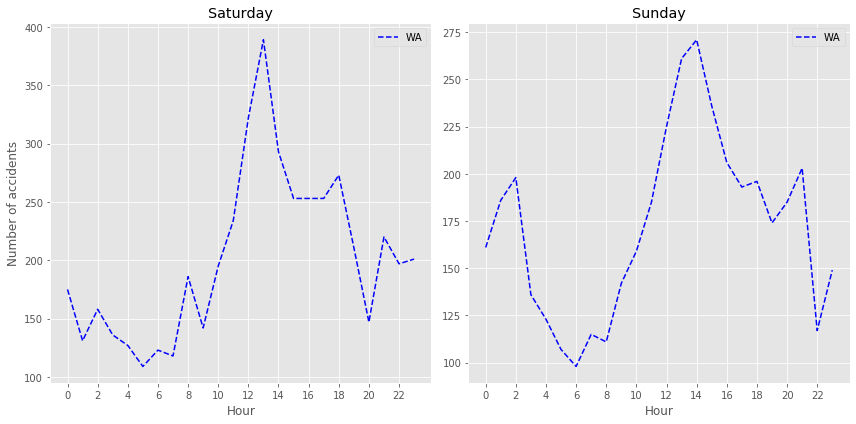

In [18]:
# Find out hourly distribution of accidents on weekends

fig= plt.figure(figsize=(12,6))

for i in range(2):
    
    plt.subplot(1, 2, i+1)

    df[(df['State']=='WA') & (df['Start_Weekday']==weekday_lst[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='b')
  
    plt.xlabel('Hour')
    plt.legend(['WA'])
    plt.title(weekday_lst_full[i+5])
    plt.xticks(np.arange(0, 24, step=2))
    
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()

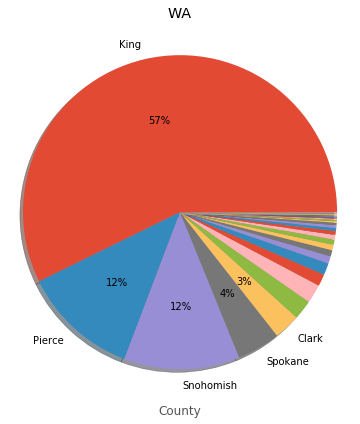

In [19]:
# Find out in which county most of the accidents are happening in WA
feature='County'

fig= plt.figure(figsize=(15,6))

pct_cutoff=2.5

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


for i,state in enumerate(state_lst):
    
    plt.subplot(1, 3, 1+i)
    
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

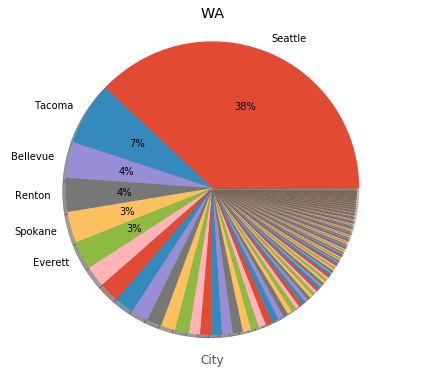

In [20]:
# Find out the city in which most of the accidents are happening
feature='City'

fig= plt.figure(figsize=(25,6))

pct_cutoff=2.5

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


for i,state in enumerate(state_lst):
    
    plt.subplot(1, 3, 1+i)

    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

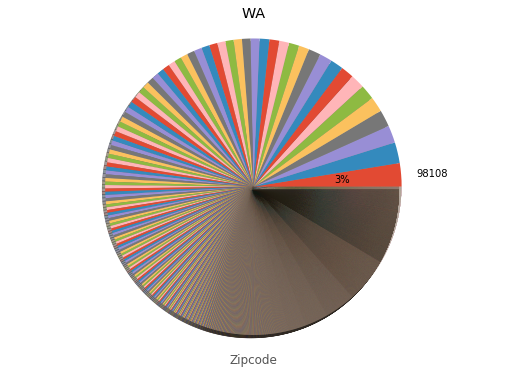

In [21]:
# Find out the location where most of the accidents are happening based on zip code
feature='Zipcode'

fig= plt.figure(figsize=(30,6))

pct_cutoff=2.5

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


for i,state in enumerate(state_lst):
    
    plt.subplot(1, 3, 1+i)
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

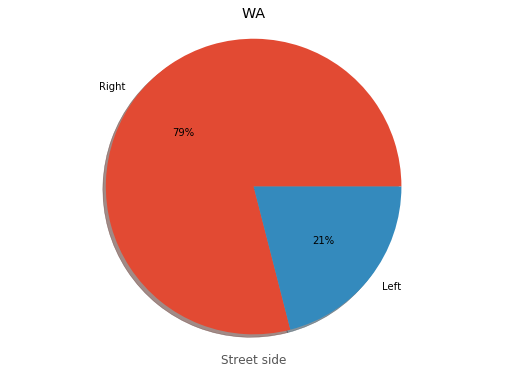

In [22]:
# Find out which part of the streets most of the accidents are happening
fig= plt.figure(figsize=(30,6))
labels=['Right','Left']

for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    df_side=df[df['State']==state]['Side'].value_counts(normalize=True).round(2)[:2]

    plt.pie(df_side, labels=labels, autopct='%1.0f%%', shadow=True)

    plt.axis('equal')
    plt.xlabel('Street side')
    plt.title('{}'.format(state))

plt.show()

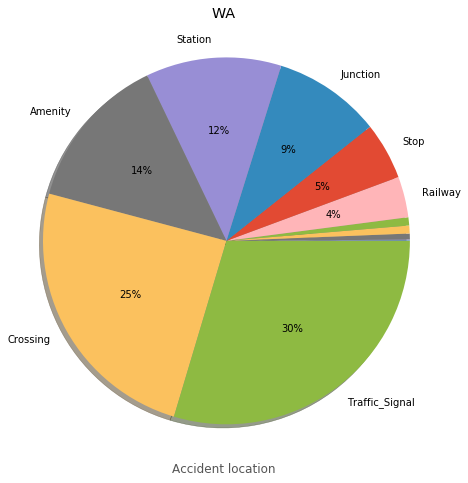

In [23]:
# Find out location of accidents

feature='Accident location'

df.set_index('State',drop=True,inplace=True)

df_bool=df.select_dtypes(include=['bool'])

df.reset_index(inplace=True)

fig= plt.figure(figsize=(25,8))

pct_cutoff=2.5

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


for i,state in enumerate(state_lst):

    plt.subplot(1, 3, 1+i)
   
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 

    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

In [24]:
# find out the weather conditions
df[df['State']==state]['Weather_Condition'].value_counts(normalize=True).round(6)

Clear                           0.205267
Overcast                        0.188333
Mostly Cloudy                   0.150910
Light Rain                      0.121448
Cloudy                          0.085376
Fair                            0.069059
Partly Cloudy                   0.066812
Scattered Clouds                0.052330
Light Snow                      0.011250
Haze                            0.011148
Fog                             0.009326
Rain                            0.008592
Smoke                           0.006125
Light Drizzle                   0.004480
Snow                            0.001527
Patches of Fog                  0.001160
Light Freezing Fog              0.001116
Cloudy / Windy                  0.001087
Heavy Rain                      0.000896
Mist                            0.000602
Light Rain / Windy              0.000426
Fair / Windy                    0.000382
Mostly Cloudy / Windy           0.000338
Light Freezing Rain             0.000264
Partly Cloudy / 

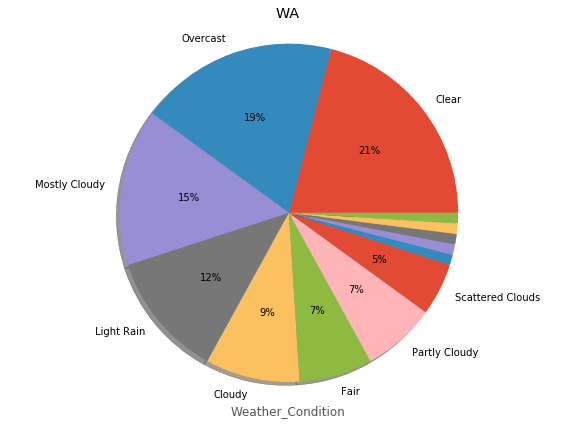

In [25]:
# Find out the weather conditions for accident
feature='Weather_Condition'

fig= plt.figure(figsize=(25,6))

pct_cutoff=2

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

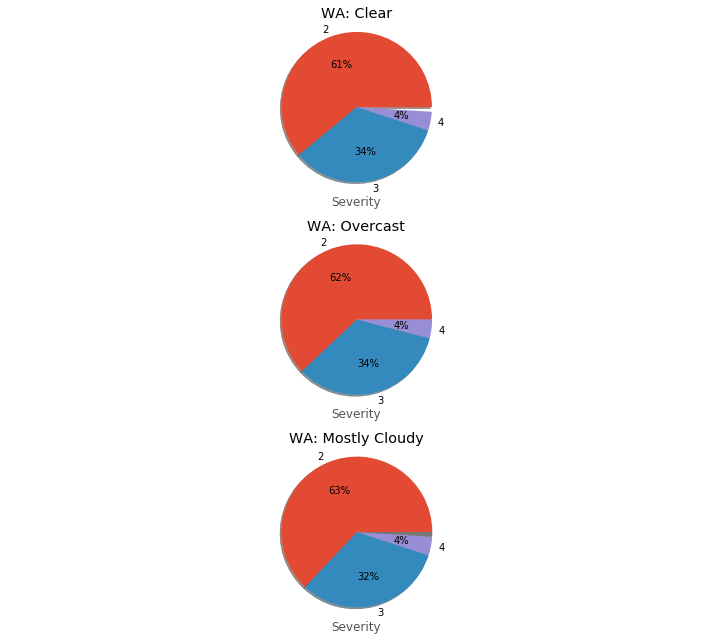

In [26]:
# Find out the accident severity for top 3 weather conditions(Clear, Overcast and Mostly Cloudy).
feature='Severity'
weather_lst=['Clear','Overcast','Mostly Cloudy']
fig_x=len(state_lst)
fig_y=len(weather_lst)

fig= plt.figure(figsize=(10*fig_x,3*fig_y))

pct_cutoff=2

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

for i,weather in enumerate(weather_lst):
    
    for j,state in enumerate(state_lst):
    
        plt.subplot(fig_y, fig_x, i*fig_x+j+1) 
        
        df_temp=df[(df['State']==state) & (df['Weather_Condition']==weather)][feature].value_counts(normalize=True).round(2)

        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': '+weather)

plt.tight_layout()
plt.show()

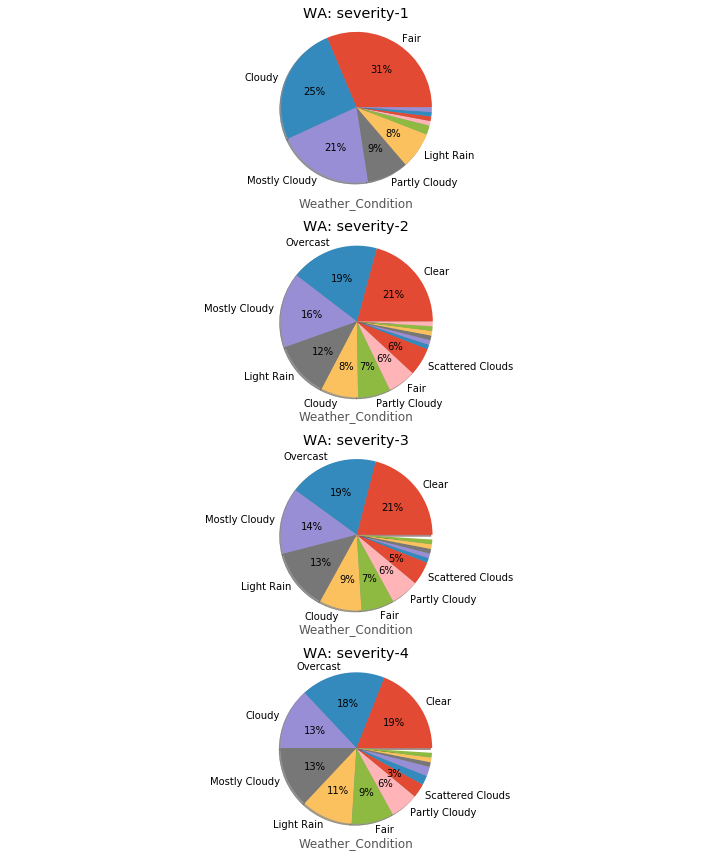

In [27]:
# Find out what is the weather conditions for each of the Severity (1, 2,3,4).
feature='Weather_Condition'
severity_lst=[1,2,3,4]
fig_x=len(state_lst)
fig_y=len(severity_lst)

fig= plt.figure(figsize=(10*fig_x,3*fig_y))

pct_cutoff=2

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

for i,severity in enumerate(severity_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):

        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity)][feature].value_counts(normalize=True).round(2)

        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
  
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': severity-'+str(severity))

plt.tight_layout()
plt.show()

## Machine learning algorithms to predict the accident severity <a name="mla"></a>

Various supervised machine learning algorithms (Logistic regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest classification) are used to predict the accident severity at King county of Washington state, where most of the accidents are happening. 

### Load required libraries for machine learning

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

### Data preprocessing

Data preprocessing was performed to avoid any missing values. 

In [29]:
# Load data
df = pd.read_csv(r'C:\Users\US_Accidents_June20.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [30]:
# Extracting year, month, day and time
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [31]:
# Find out any negative time_duration values
df[td][df[td]<=0]

69719      -0.0
69720      -0.0
69721      -0.0
69722      -1.0
69723      -1.0
309387    -30.0
309388    -30.0
860988    -12.0
861024    -31.0
861041     -0.0
861475    -14.0
861494     -0.0
861495    -30.0
1497823   -30.0
1497824   -31.0
2234574   -30.0
2234659   -30.0
2234660   -31.0
3104499   -34.0
3104975    -7.0
3104978    -7.0
3232740   -31.0
Name: Time_Duration(min), dtype: float64

In [32]:
neg_outliers=df[td]<=0

df[neg_outliers] = np.nan

df.dropna(subset=[td],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513595 entries, 0 to 3513616
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               float64       
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [33]:
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [34]:
n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

df[outliers] = np.nan

df[td].fillna(median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513595 entries, 0 to 3513616
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               float64       
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [35]:
# Time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 10140.0 minutes or 169 hours or 7 days; Min to clear an accident td: 1.0 minutes.


In [36]:
df.to_csv('US_Accidents_June20_clean.csv', index=False) 

In [37]:
# Select a few relevent features for Machine Learning based on the impact on accident
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [38]:
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513595 entries, 0 to 3513616
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   TMC                 float64
 2   Severity            float64
 3   Start_Lng           float64
 4   Start_Lat           float64
 5   Distance(mi)        float64
 6   Side                object 
 7   City                object 
 8   County              object 
 9   State               object 
 10  Timezone            object 
 11  Temperature(F)      float64
 12  Humidity(%)         float64
 13  Pressure(in)        float64
 14  Visibility(mi)      float64
 15  Wind_Direction      object 
 16  Weather_Condition   object 
 17  Amenity             float64
 18  Bump                float64
 19  Crossing            float64
 20  Give_Way            float64
 21  Junction            float64
 22  No_Exit             float64
 23  Railway             float64
 24  Roundabout          floa

In [39]:
df_sel.to_csv('US_Accidents_June20_clean_sel.csv', index=False)

In [40]:
df_sel.isnull().mean()

Source                0.000194
TMC                   0.294525
Severity              0.000194
Start_Lng             0.000194
Start_Lat             0.000194
Distance(mi)          0.000194
Side                  0.000194
City                  0.000225
County                0.000194
State                 0.000194
Timezone              0.001298
Temperature(F)        0.018894
Humidity(%)           0.020019
Pressure(in)          0.016092
Visibility(mi)        0.021775
Wind_Direction        0.016945
Weather_Condition     0.021855
Amenity               0.000194
Bump                  0.000194
Crossing              0.000194
Give_Way              0.000194
Junction              0.000194
No_Exit               0.000194
Railway               0.000194
Roundabout            0.000194
Station               0.000194
Stop                  0.000194
Traffic_Calming       0.000194
Traffic_Signal        0.000194
Turning_Loop          0.000194
Sunrise_Sunset        0.000226
Hour                  0.000194
Weekday 

In [41]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(2408025, 34)

In [42]:
df_sel.to_csv('US_Accidents_June20_clean_sel_dropna.csv',index=False)

### Select the County of interest: King

In [43]:
df_sel=pd.read_csv('US_Accidents_June20_clean_sel_dropna.csv')

In [44]:
# Select the state 
state='WA'

df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47096 entries, 297447 to 2407679
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              47096 non-null  object 
 1   TMC                 47096 non-null  float64
 2   Severity            47096 non-null  float64
 3   Start_Lng           47096 non-null  float64
 4   Start_Lat           47096 non-null  float64
 5   Distance(mi)        47096 non-null  float64
 6   Side                47096 non-null  object 
 7   City                47096 non-null  object 
 8   County              47096 non-null  object 
 9   Timezone            47096 non-null  object 
 10  Temperature(F)      47096 non-null  float64
 11  Humidity(%)         47096 non-null  float64
 12  Pressure(in)        47096 non-null  float64
 13  Visibility(mi)      47096 non-null  float64
 14  Wind_Direction      47096 non-null  object 
 15  Weather_Condition   47096 non-null  object 
 1

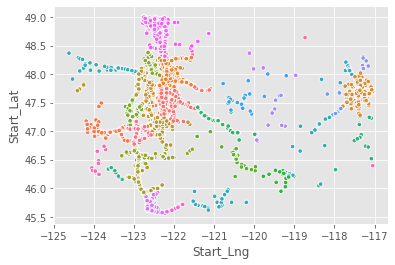

In [45]:
# Find out accidents by county

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [46]:
# Select the county
county='King'

df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28363 entries, 297449 to 2407666
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              28363 non-null  object 
 1   TMC                 28363 non-null  float64
 2   Severity            28363 non-null  float64
 3   Start_Lng           28363 non-null  float64
 4   Start_Lat           28363 non-null  float64
 5   Distance(mi)        28363 non-null  float64
 6   Side                28363 non-null  object 
 7   City                28363 non-null  object 
 8   Timezone            28363 non-null  object 
 9   Temperature(F)      28363 non-null  float64
 10  Humidity(%)         28363 non-null  float64
 11  Pressure(in)        28363 non-null  float64
 12  Visibility(mi)      28363 non-null  float64
 13  Wind_Direction      28363 non-null  object 
 14  Weather_Condition   28363 non-null  object 
 15  Amenity             28363 non-null  float64
 1

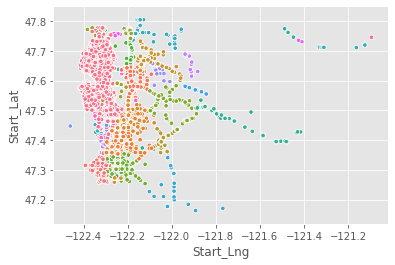

In [47]:
# Find out accidents by city

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=20)
plt.show()

In [48]:
df_county_dummy = pd.get_dummies(df_county,drop_first=True)

df_county_dummy.to_csv('US_Accidents_June20_{}_dummy.csv'.format(state),index=False)

df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28363 entries, 297449 to 2407666
Columns: 132 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(108)
memory usage: 8.3 MB


In [49]:
# Split the data set into training and testing 
df=df_county_dummy

target='Severity'

y = df[target]
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [50]:
# List of machine learning algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

accuracy_lst=[]

### Logistic regression

In [51]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

acc=accuracy_score(y_test, y_pred)

accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.772.


C:\Users\sanoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### The K-Nearest Neighbors (KNN) 

In [52]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

acc=accuracy_score(y_test, y_pred)

accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.680.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.680.


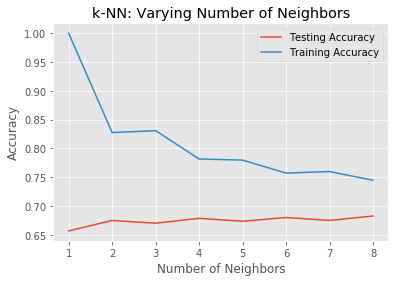

In [53]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, n_neighbor in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Decision Tree

In [54]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred= dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred)
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred= dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred)
acc=accuracy_gini
accuracy_lst.append(acc)
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.855.
[Decision Tree -- gini] accuracy_score: 0.855.


### Random Forest

In [55]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.925.


No handles with labels found to put in legend.


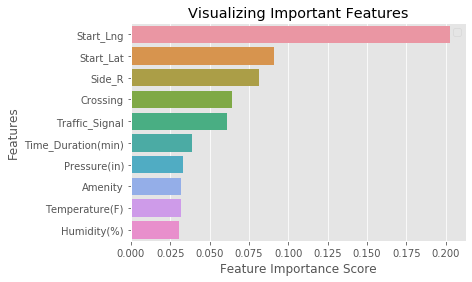

In [56]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [57]:
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Lng             0.202536
Start_Lat             0.091149
Side_R                0.081495
Crossing              0.064270
Traffic_Signal        0.060871
Time_Duration(min)    0.038766
Pressure(in)          0.033102
Amenity               0.031963
Temperature(F)        0.031509
Humidity(%)           0.030352
Hour                  0.029171
TMC                   0.026637
Distance(mi)          0.023750
City_Seattle          0.021867
City_Bellevue         0.015614
Stop                  0.011014
City_Auburn           0.010577
Station               0.009301
Visibility(mi)        0.009118
City_Kirkland         0.007129
dtype: float64

In [58]:
# Find out the top ten features 
sfm = SelectFromModel(clf, threshold=0.03)

sfm.fit(X_train, y_train)

feat_labels=X.columns

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Temperature(F)
Humidity(%)
Pressure(in)
Amenity
Crossing
Traffic_Signal
Time_Duration(min)
Side_R


In [59]:
# Generate a new dataset based on the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
# Find out the accuracy based on new dataset
y_pred = clf.predict(X_test)
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

y_important_pred = clf_important.predict(X_important_test)

print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.925.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.936.


### Accuracy score versus algorithm

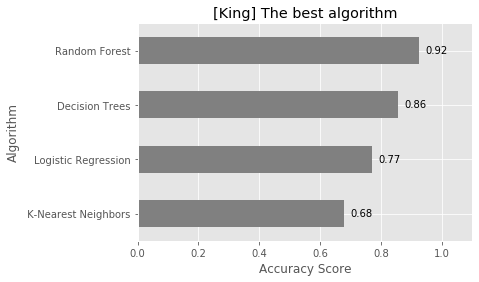

In [61]:
y_ticks=np.arange(len(algo_lst))

df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

for i in ax.patches:
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}] The best algorithm'.format(county))

plt.show()

## Results and discussion <a name="results"></a>
Exploratory data analysis has been done to figure out the various factors leading to road accidents.  Monthly collision rate analysis did not give any insight for predicting the possibility of an accident. The severity of accidents was analysed in a scale of 1-4 (level 4-most severe). It was found that most of the accidents are in the level 2. Most of the accidents are happening during daytime and it could be due to the heavy traffic compared to night time. It is not recommended to travel around 7-8 am and 4-5pm on weekdays as most of the accidents are happening during these rush hours. Similarly, early afternoon is not recommended for weekends. Above 50% traffic collisions are reported from King county in WA and most of those accidents are happening in Seattle city. There is huge possibility for road accidents on right side of the street in WA and in terms of locations, traffic signals and crossings are the most dangerous places. 79% of accidents occurred at the right side of the street in WA. 30% of accidents are occurring at traffic signal, followed by crossing (25%).   Clear, overcast, mostly cloudy, light rain, and cloudy are the topmost 5 weather conditions for accidents.  Among them we could eliminate clear condition because most of the days are clear. The accident severity for King county was predicted by applying machine learning algorithms and Random Forest classification showed the highest accuracy.  Top ten features for prediction of accident severity for King county was extracted using Random Forest classification model.

## Conclusions <a name="conclusions"></a>
In this project, traffic collision data for WA state has been analysed and machine learning algorithms were applied to predict the accident severity for King county. Various features were analysed and the most important contributing factors which could lead to road crash fatalities and disabilities were identified and listed. The built model to predict the real time accident severity will be very useful for the people in King. 